Exercise on Random Forest Regression

Diamond Price Prediction Regression

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 11)

In [6]:
df=df.drop(columns="depth")

In [7]:
df = df.rename(columns={"x": "Length"  })

In [8]:
df = df.rename(columns={"y": "Width" ,"z":"Depthv2" })

In [9]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'table', 'price',
       'Length', 'Width', 'Depthv2'],
      dtype='object')

In [10]:
df.describe()

,Unnamed: 0,carat,table,price,Length,Width,Depthv2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
table         0
price         0
Length        0
Width         0
Depthv2       0
dtype: int64

In [12]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'table', 'price',
       'Length', 'Width', 'Depthv2'],
      dtype='object')

In [13]:
Numeric_column = ['carat','Depthv2','table','price','Length','Width']

In [14]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

In [17]:
print(Numeric_column)

['carat', 'Depthv2', 'table', 'price', 'Length', 'Width']


In [18]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,table,price,Length,Width,Depthv2
0,1,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


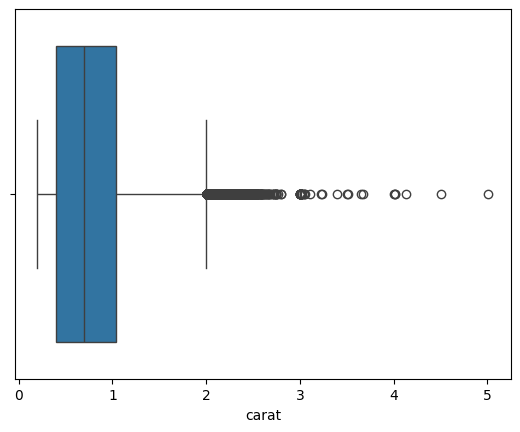

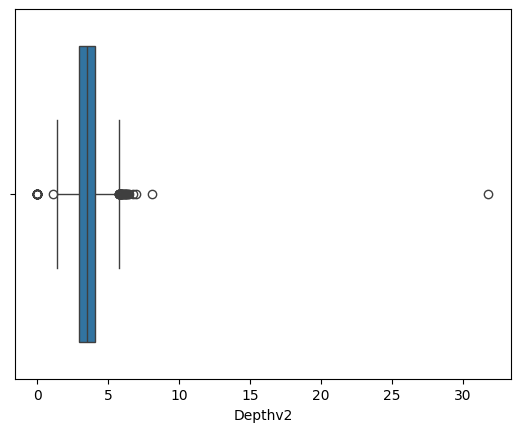

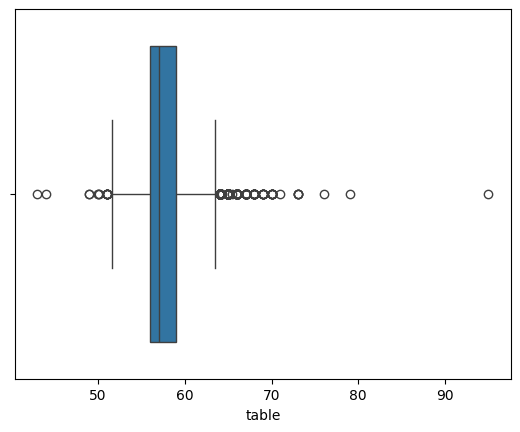

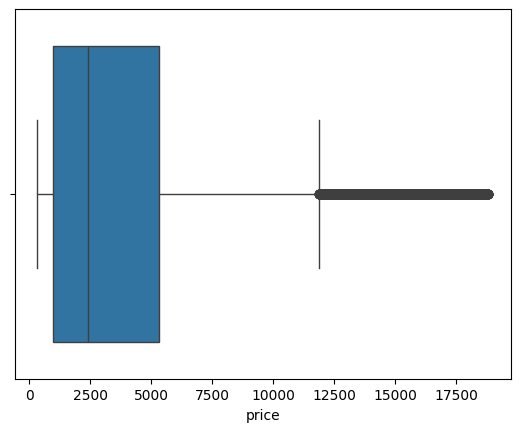

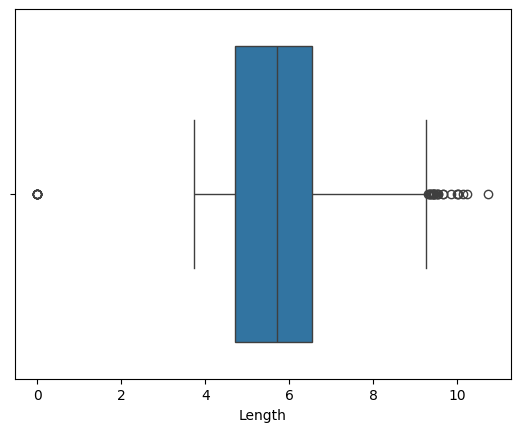

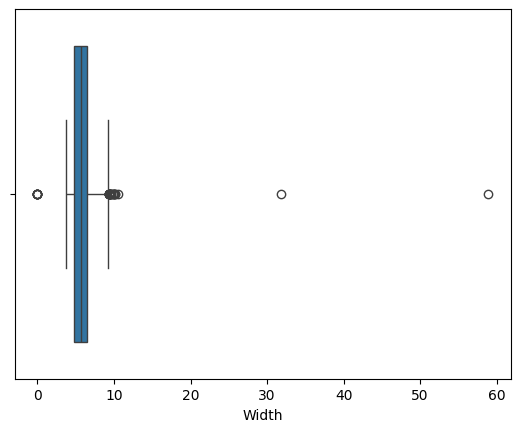

In [19]:
for col in Numeric_column:
    sns.boxplot(x=col,data=df)
    plt.show()

In [20]:
for col in Numeric_column:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower =  q1 - iqr*1.5
    higher = q3 + iqr*1.5
    
    med = df[col].median()
    
    for i in df[col]:
        if i < lower or i > higher:
            df[col] = df[col].replace(i,med)




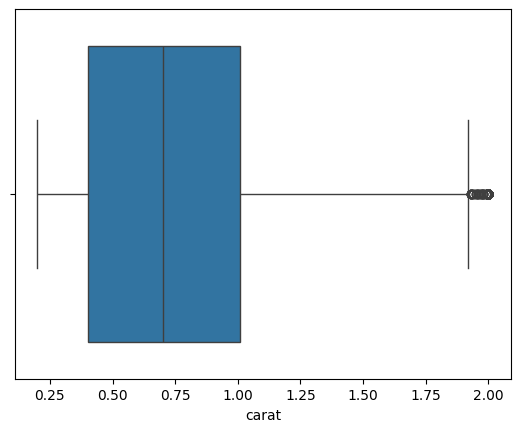

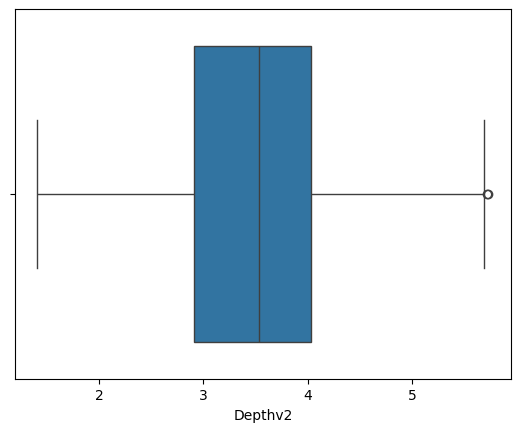

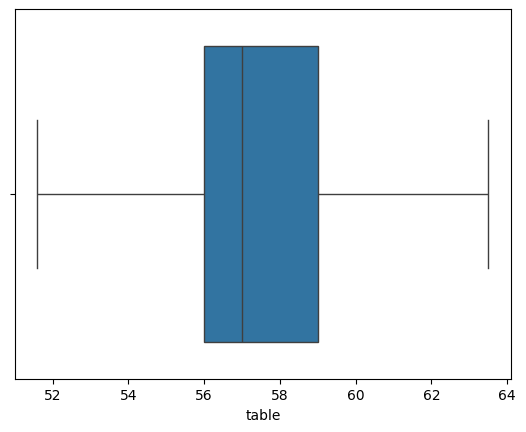

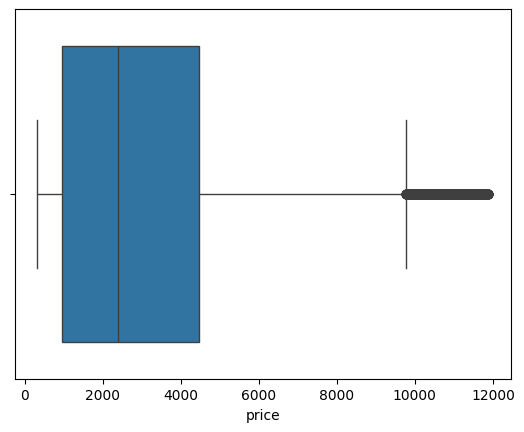

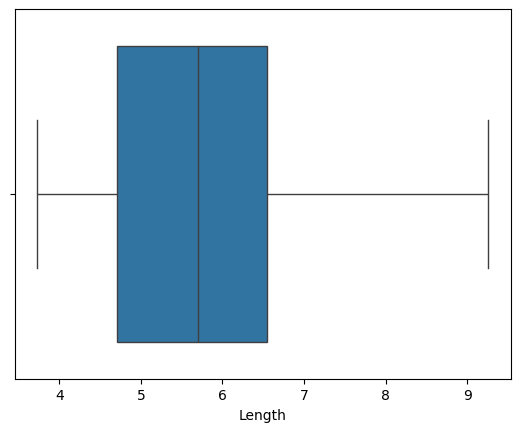

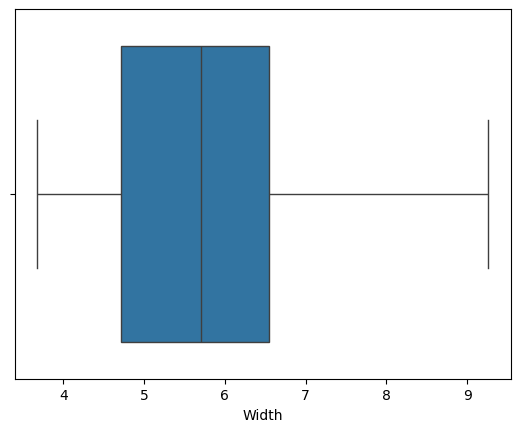

In [21]:
for col in Numeric_column:
    sns.boxplot(x=col,data=df)
    plt.show()

In [22]:
df

,Unnamed: 0,carat,cut,color,clarity,table,price,Length,Width,Depthv2
0,1,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,57.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


In [23]:
df.describe()

,Unnamed: 0,carat,table,price,Length,Width,Depthv2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.747031,57.369216,3109.684205,5.730244,5.732341,3.538257
std,15571.281097,0.395094,2.063058,2679.029562,1.116502,1.108834,0.689160
min,1.000000,0.200000,51.600000,326.000000,3.730000,3.680000,1.410000
25%,13485.750000,0.400000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.010000,59.000000,4478.000000,6.540000,6.540000,4.030000
max,53940.000000,2.000000,63.500000,11883.000000,9.260000,9.260000,5.730000


In [24]:
df = df.drop(columns = 'Unnamed: 0')

In [25]:
df.head()

,carat,cut,color,clarity,table,price,Length,Width,Depthv2
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,57.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


In [ ]:
#EDA

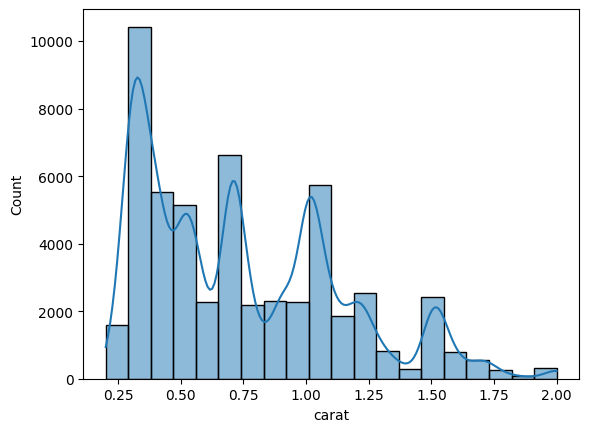

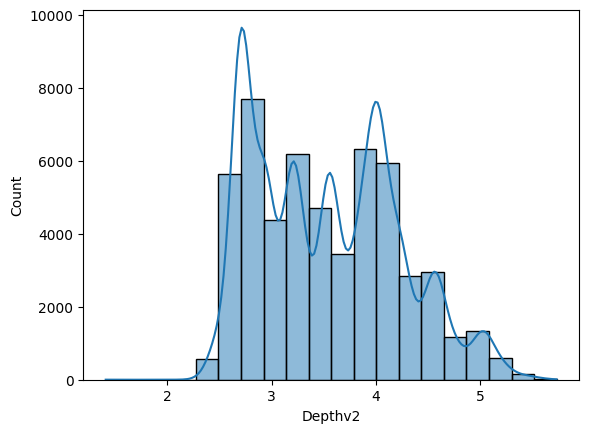

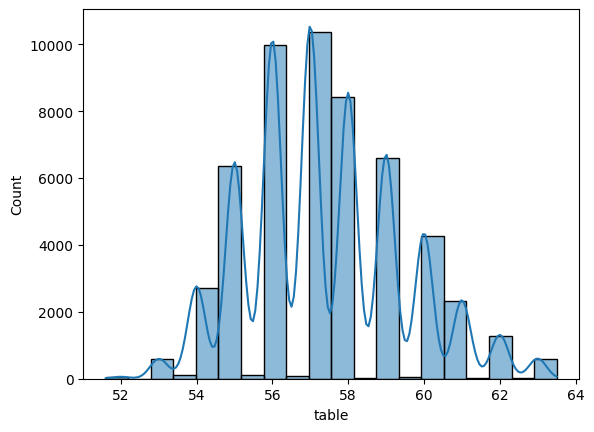

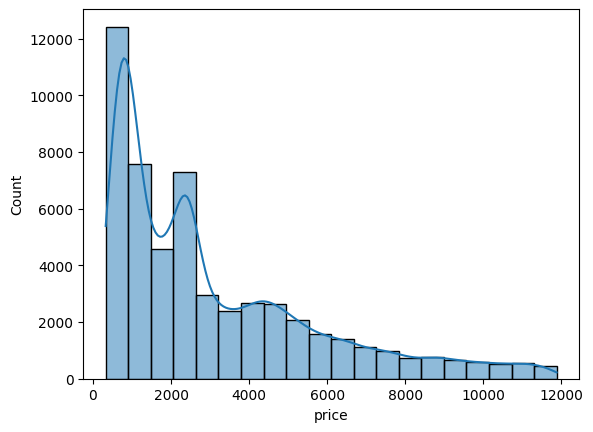

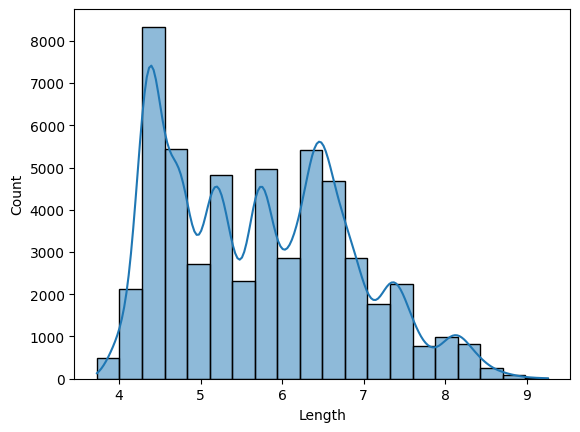

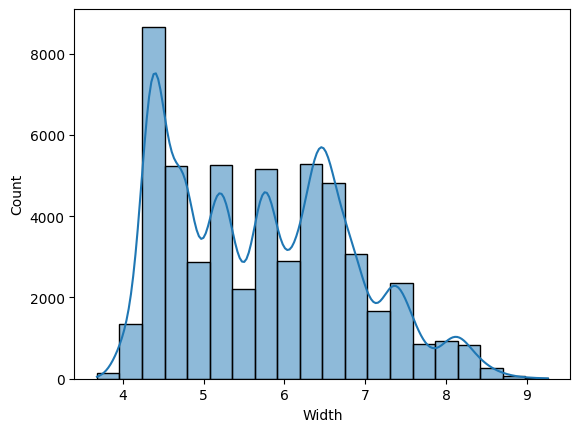

In [26]:
for col in Numeric_column:
    sns.histplot(data=df,x=col,bins=20,kde=True)
    plt.show()

In [36]:
df.head()

,carat,cut,color,clarity,table,price,Length,Width,Depthv2
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,57.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


<Axes: xlabel='cut', ylabel='count'>

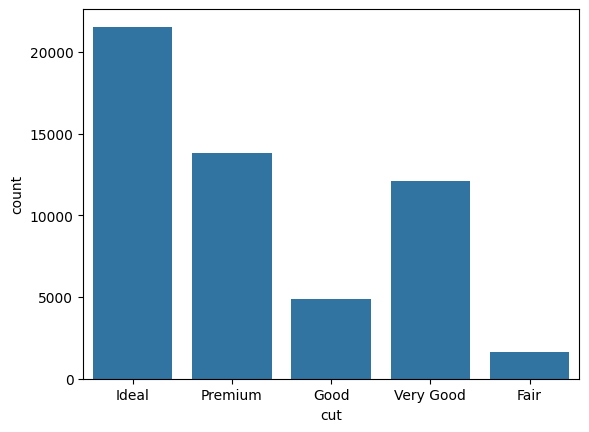

In [37]:
sns.countplot(data=df , x='cut')

<Axes: xlabel='color', ylabel='count'>

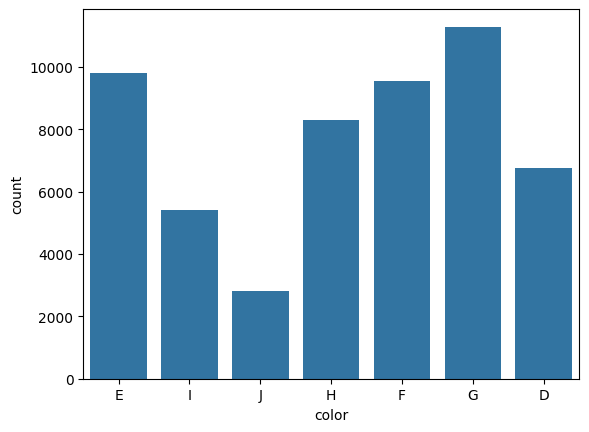

In [31]:
sns.countplot(data=df ,x='color')

<Axes: xlabel='clarity', ylabel='count'>

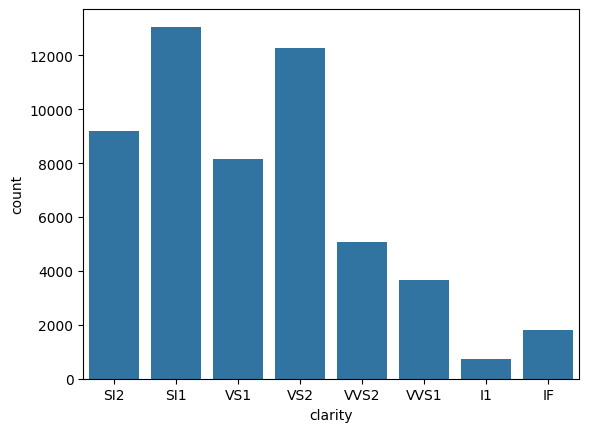

In [32]:
sns.countplot(data=df,x='clarity')

In [38]:
df.head()

,carat,cut,color,clarity,table,price,Length,Width,Depthv2
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,57.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


BI Variante

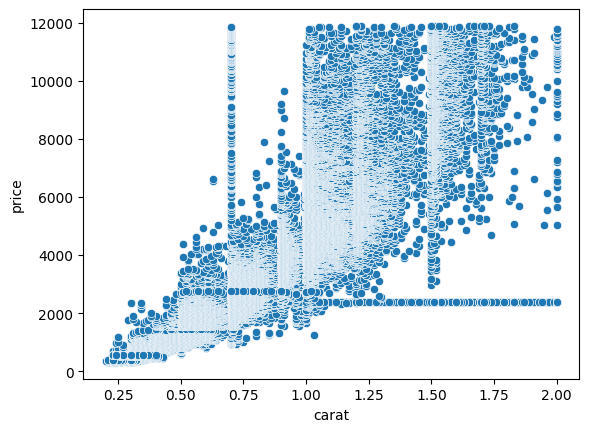

In [39]:
sns.scatterplot(x='carat',y='price',data=df)
plt.show()

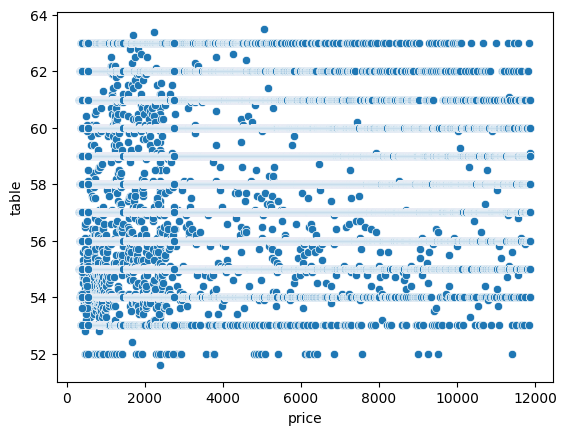

In [41]:
sns.scatterplot(x='price',y='table',data=df)
plt.show()

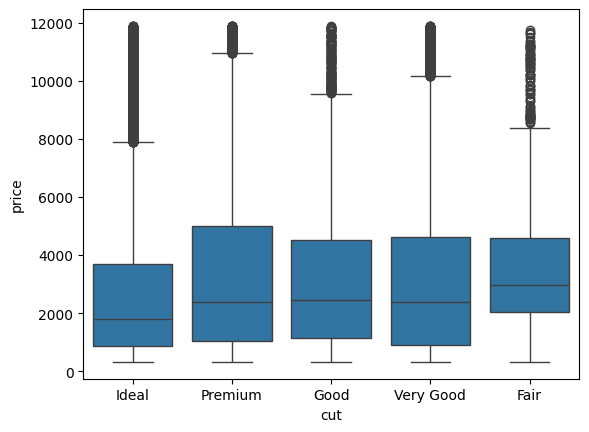

In [43]:
sns.boxplot(data=df,x='cut',y='price')
plt.show()

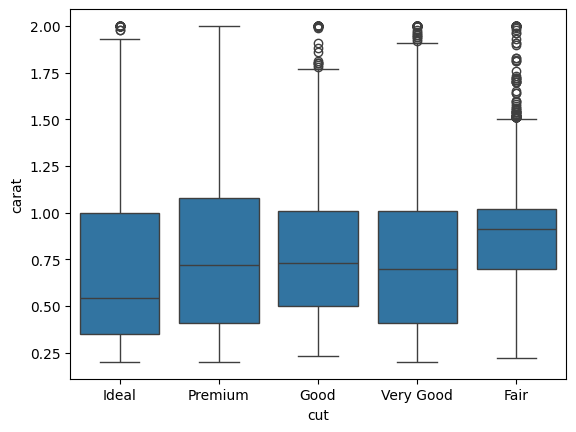

In [45]:
sns.boxplot(data=df,x='cut',y='carat')
plt.show()

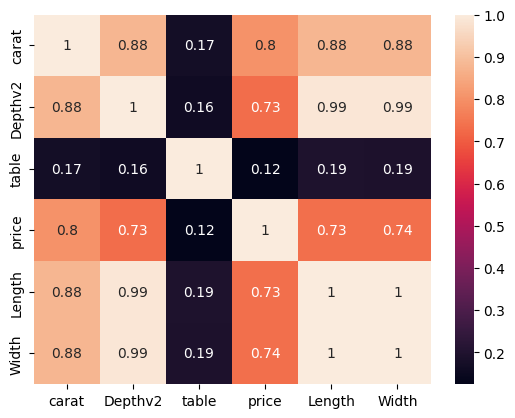

In [47]:
corr = df[Numeric_column].corr()

sns.heatmap(corr,annot=True)
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
Le = LabelEncoder()

In [50]:
cat_column = ['cut','color','clarity']
              

In [52]:
for col in cat_column:
    df[col] = Le.fit_transform(df[col]) 

In [53]:
df.head()

,carat,cut,color,clarity,table,price,Length,Width,Depthv2
0,0.23,2,1,3,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,57.0,327,4.05,4.07,2.31
3,0.29,3,5,5,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,58.0,335,4.34,4.35,2.75


In [54]:
df.describe()

,carat,cut,color,clarity,table,price,Length,Width,Depthv2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.747031,2.553003,2.594197,3.835150,57.369216,3109.684205,5.730244,5.732341,3.538257
std,0.395094,1.027708,1.701105,1.724591,2.063058,2679.029562,1.116502,1.108834,0.689160
min,0.200000,0.000000,0.000000,0.000000,51.600000,326.000000,3.730000,3.680000,1.410000
25%,0.400000,2.000000,1.000000,2.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.010000,3.000000,4.000000,5.000000,59.000000,4478.000000,6.540000,6.540000,4.030000
max,2.000000,4.000000,6.000000,7.000000,63.500000,11883.000000,9.260000,9.260000,5.730000


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
std = StandardScaler()

In [65]:
df["price"] = std.fit_transform(df[["price"]])

In [66]:
df.head()

,carat,cut,color,clarity,table,price,Length,Width,Depthv2
0,0.23,2,1,3,55.0,-1.039074,3.95,3.98,2.43
1,0.21,3,1,2,61.0,-1.039074,3.89,3.84,2.31
2,0.23,1,1,4,57.0,-1.038701,4.05,4.07,2.31
3,0.29,3,5,5,58.0,-1.036088,4.20,4.23,2.63
4,0.31,1,6,3,58.0,-1.035715,4.34,4.35,2.75


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop(columns = "price")

In [70]:
y = df["price"]

In [71]:
X_Train , X_Test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42) 

In [72]:
X_Train.head()

,carat,cut,color,clarity,table,Length,Width,Depthv2
19497,1.21,2,4,7,57.0,6.92,6.87,4.23
31229,0.31,2,1,5,56.0,4.38,4.36,2.71
22311,1.21,2,1,4,57.0,6.75,6.83,4.24
278,0.81,2,2,3,55.0,5.92,5.96,3.72
6646,0.79,2,5,7,56.0,5.94,5.95,3.67


In [73]:
X_Test.head()

,carat,cut,color,clarity,table,Length,Width,Depthv2
1388,0.24,2,3,6,56.0,3.97,4.00,2.47
50052,0.58,4,2,7,57.0,5.44,5.42,3.26
41645,0.40,2,1,7,55.0,4.76,4.74,2.95
42377,0.43,3,1,7,57.0,4.92,4.89,2.98
17244,1.55,2,1,3,55.0,7.44,7.37,4.61


In [74]:
y_train.head()

19497    1.874321
31229   -0.878567
22311    2.702987
278     -0.117463
6646     0.366672
Name: price, dtype: float64

In [75]:
y_test.head()

1388    -0.952101
50052   -0.339187
41645   -0.698649
42377   -0.674013
17244    1.415196
Name: price, dtype: float64

In [90]:

from sklearn.ensemble import RandomForestRegressor




In [92]:
rcf_model= RandomForestRegressor(random_state=42)

In [93]:
rcf_model.fit(X_Train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
y_pred = rcf_model.predict(X_Test)

In [97]:
y_pred

array([-0.95658443, -0.27032957, -0.70397942, ..., -0.19555927,
        0.06297704, -0.67090744], shape=(16182,))

In [100]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [102]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [104]:
print(f"\n Recall {r2} \n Mean absolute error {mae} \n Mean square error {rmse}")


 Recall 0.8949289149838892 
 Mean absolute error 0.12181331142743715 
 Mean square error 0.3202696669589373
